# Customer Categorization of a Telecommunications Provider using Logestic Regression 

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 

## Data downloading 
To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-04-21 12:09:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: 'ChurnData.csv'

     0K .......... .......... .......... .....                100% 37.6K=0.9s

2024-04-21 12:09:20 (37.6 KB/s) - 'ChurnData.csv' saved [35943/35943]



## Load data from CSV

In [3]:
df = pd.read_csv("ChurnData.csv")
df[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and selection
Let's select some features for the modeling

In [4]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df['churn'] = df['churn'].astype(int)
df[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [25]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].values)
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [26]:
Y =np.asarray(df['churn'].values)
Y[0:5]

array([1, 1, 0, 0, 0])

## Normalize the dataset

In [27]:
scaler = preprocessing.StandardScaler().fit(X)
nX = scaler.transform(X)
nX[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train and test dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Modeling

In [29]:
#Train our model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [15]:
#Predict
yhat = LR.predict(X_test)
print(yhat)
print(Y_test)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0]
[0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0]


In [30]:
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)
# The firs column is P(yaht = 0|X) and the second column is P(yaht = 1|X)

[[0.85690857 0.14309143]
 [0.8697156  0.1302844 ]
 [0.76166698 0.23833302]
 [0.90407428 0.09592572]
 [0.73013344 0.26986656]
 [0.51687948 0.48312052]
 [0.62528805 0.37471195]
 [0.87343004 0.12656996]
 [0.41738015 0.58261985]
 [0.90879227 0.09120773]
 [0.91197227 0.08802773]
 [0.94638922 0.05361078]
 [0.46056268 0.53943732]
 [0.50728319 0.49271681]
 [0.85969108 0.14030892]
 [0.83853006 0.16146994]
 [0.69422555 0.30577445]
 [0.83555304 0.16444696]
 [0.76818077 0.23181923]
 [0.63304223 0.36695777]
 [0.86342114 0.13657886]
 [0.6537177  0.3462823 ]
 [0.93254727 0.06745273]
 [0.5620099  0.4379901 ]
 [0.796927   0.203073  ]
 [0.95143725 0.04856275]
 [0.77561377 0.22438623]
 [0.80906014 0.19093986]
 [0.59530665 0.40469335]
 [0.96431506 0.03568494]
 [0.90438828 0.09561172]
 [0.87913341 0.12086659]
 [0.42281946 0.57718054]
 [0.91326363 0.08673637]
 [0.87624474 0.12375526]
 [0.75317831 0.24682169]
 [0.36816342 0.63183658]
 [0.55450678 0.44549322]
 [0.96939574 0.03060426]
 [0.86392762 0.13607238]]

## Evaluation

### Jaccard Score

In [31]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat, pos_label = 0)

0.6486486486486487

### Confusion matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, yhat, labels=[1,0]))

[[ 3 12]
 [ 1 24]]


Confusion matrix, without normalization
[[ 3 12]
 [ 1 24]]


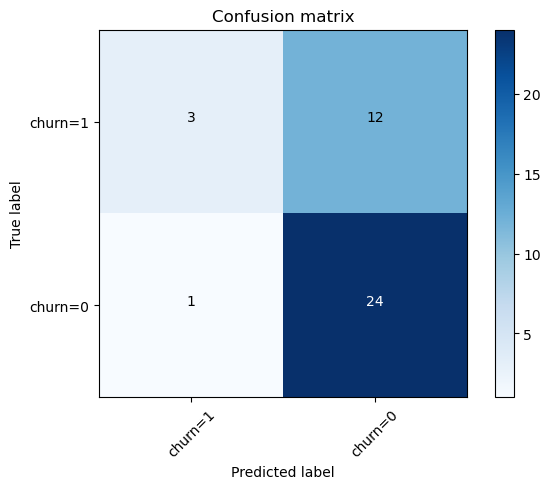

In [38]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels = [1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [40]:
print (classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.75      0.20      0.32        15

    accuracy                           0.68        40
   macro avg       0.71      0.58      0.55        40
weighted avg       0.70      0.68      0.61        40



In [41]:
from sklearn.metrics import log_loss
log_loss(Y_test, yhat_prob)

0.5633358354733691

In [43]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,Y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(Y_test, yhat_prob2))

LogLoss: : 0.62


F:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
